<a href="https://colab.research.google.com/github/ElizabethB111/MESA-8410-Final-Project/blob/main/3_Track_2_Data_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Visualizations Related to Police Perceptions/Attitudes on Effectiveness/Attention to Potential Crimes Against Women**

Leveraged Seaborn and MatPlotLib Libraries to Create Visual Summaries (Bar Charts) to Show Police Attitudes and Changes From the Beginning to the End of Study.


**High Level Approach:**

*   Create Bar Charts Showing Distribution of Responses Across Key Questions Related to Effectiveness, Attention, Helpfulness, and Hiring Needed Related to Crimes Against Women.

*   Make Sure Charts Reflect Responses of Treatment and Control Groups Separately.

*   Clearly Title Each Chart with the Survey Questioned Being Posed.

*   Add % of Respondents for Each Response, Specific to Each Group (Treatment/Control) as Labels to Each Bar Chart.

***Key Findings to Date***

* Original study findings of lack of change in perception and sensitivity among police officers is confirmed.

* There is an overwhelming belief among police that they are effective and helpful in addressing crimes against women at BOTH baseline and endline.

* There is evidence of the widespread patriarchal values persisting in the police -> a common belief that 'too much attention' is paid to CAW cases and even though there is a recognition that women police members are more effective in dealing CAW, there is a signficant belief that hiring more women staff will NOT help.

Import Required Libraries

In [ ]:
# IMPORT LIBRARIES BELOW
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add a special library for working with tables:
from tabulate import tabulate


### Reading in the data
The data is police_outer_person_data.csv (created in separate notebook " Final_Project_Merging_Data_for_Q5_Analysis_ipynb")

In [ ]:
# the code below allows you to access your Google Drive.
from google.colab import drive

drive.mount('/content/drive')

# root_dir is the path to your My_Drive folder.
root_dir = "/content/drive/My Drive/"

# Store the dataframes in the following directory.
data_folder = root_dir + "Colab Notebooks/Final Project/Data/"

# the CSV data file created in the Q5_data_prep notebook is located here
# contains an outer join of the baseline and full police survey data with the police personnel data appended to each row
inputfile1 = "/content/drive/My Drive/Colab Notebooks/Final Project/Data/police_outer_person_data.csv"

# Read the CSV file into a dataframes
police_person_data = pd.read_csv(inputfile1)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Initial Sample Records and Descriptive Stats of the Data


In [ ]:
# Use `head()` to get an overview of the first few records in the respondent level dataset
print ('Police Survey + Personnel Data Records')
police_person_data.head(5)

Police Survey + Personnel Data Records


,Unnamed: 0_x,b_uid,gender_x,b_pol_impt_x,b_thana_impt_x,b_wcase_x,b_effective_x,b_helpful_x,b_add_officer_x,b_add_female_x,...,dist_id,implement_quality,training_score,comm_outreach_strength,regular_whd,women_whd,e_male_weight,b_male_weight,e_female_weight,b_female_weight
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2000.0,9.0,3.77907,2.16,0.0,1.0,3.333333,2.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2000.0,9.0,3.77907,2.16,0.0,1.0,3.333333,2.0,NaN,NaN
2,125.0,2141762.0,m,0.0,0.0,enough attention,very effective,helpful,more effective,much less effective,...,2000.0,9.0,3.77907,2.16,0.0,1.0,3.333333,2.0,NaN,NaN
3,121.0,2141764.0,m,0.0,0.0,too much attention,very effective,very helpful,much more effective,much less effective,...,2000.0,9.0,3.77907,2.16,0.0,1.0,3.333333,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2000.0,9.0,3.77907,2.16,0.0,1.0,3.333333,2.0,NaN,NaN


In [ ]:
# Check the number of rows and columns with `shape`
print("Rows and Column Count, Police Survey + Personnel Data:",police_person_data.shape)

# Confirming Distinct Row Keys on Data Set -> Should Match Row Count;

distinct_b_uid_keys = police_person_data['b_uid'].nunique()
distinct_uid_keys = police_person_data['uid'].nunique()
distinct_pscode_keys = police_person_data['ps_code'].nunique()

print("Distinct b_uid keys:", distinct_b_uid_keys)
print("Distinct uid keys:", distinct_uid_keys)
print("Distinct PS Code keys:", distinct_pscode_keys)

Rows and Column Count, Police Survey + Personnel Data: (2843, 108)
Distinct b_uid keys: 1950
Distinct uid keys: 2032
Distinct PS Code keys: 180


The dataframe has b_uid for respondents and baseline and uid for respondents at endline. Police personnel data (station level) is duplicated across each record and is at the ps_code level.   Next, we limit the data to the percpetion and station characterisitic data columns required for EDA.

As a next step below, limit the responsder data to responders who responded at both baseline and endline.


In [ ]:
# Create visualizations on rows containing survey responders at baseline and endline
# New dataframe with only those records

police_person_data_both = police_person_data.dropna(subset=['b_uid','uid'])

# Check the number of rows and columns with `shape`
print("Rows and Column Count, Police Survey + Personnel Data:",police_person_data_both.shape)


Rows and Column Count, Police Survey + Personnel Data: (1139, 108)


<ipython-input-6-679aa083ab23>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(), rotation=60, ha="right")
<ipython-input-6-679aa083ab23>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.axes[0, 1].set_xticklabels(ax.axes[0, 1].get_xticklabels(), rotation=60, ha="right")


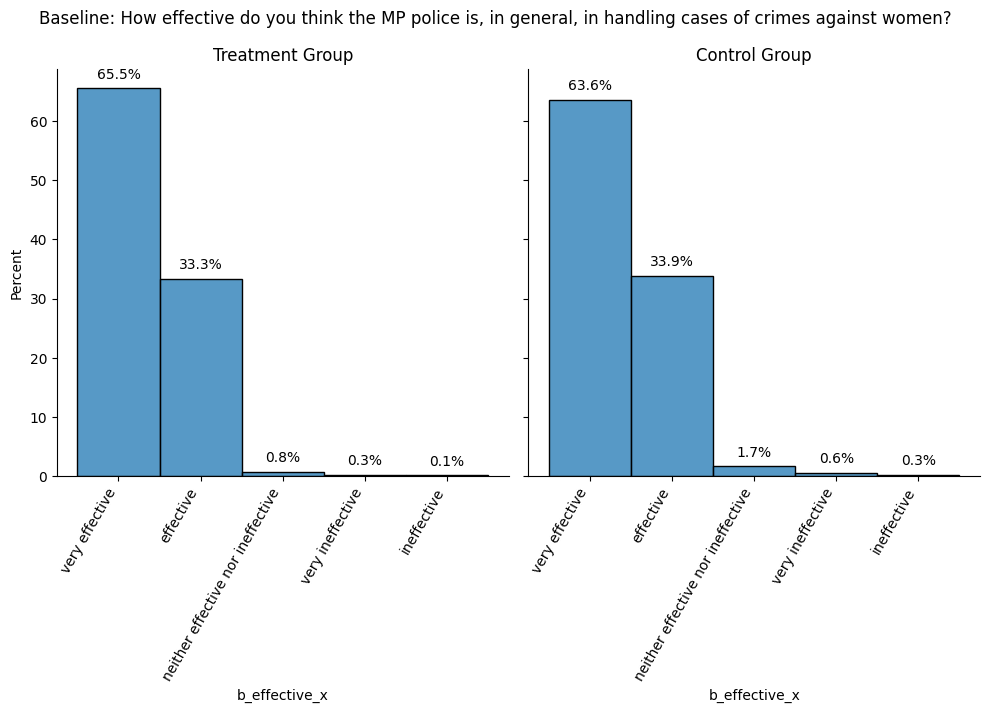

In [ ]:
# Plot Baseline Study Attitudes on the Effectiveness of Police
# Plot using Seaborn distplot

ax=sns.displot(police_person_data_both, x='b_effective_x', stat="percent", kind="hist", col="treatment_x", common_norm=False)

ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(), rotation=60, ha="right")
ax.axes[0, 1].set_xticklabels(ax.axes[0, 1].get_xticklabels(), rotation=60, ha="right")

# Iterate through the axes objects within the FacetGrid
for ax_i in ax.axes.flat:
    # Access the patches (bars) within the current subplot
    for p in ax_i.patches:
        # Annotate each bar with its height (percentage)
        ax_i.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

for ax, title in zip(ax.axes.flat, ['Treatment Group', 'Control Group']):
    ax.set_title(title)

ax.figure.suptitle("Baseline: How effective do you think the MP police is, in general, in handling cases of crimes against women?", y=1.05)

plt.show()

At Baseline, over 98% of police repondents believe that the police are effective or very effective at dealing with CAW.  Similar distributions across treatment and control station responders.

<ipython-input-7-c2a224751b77>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(), rotation=60, ha="right")
<ipython-input-7-c2a224751b77>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.axes[0, 1].set_xticklabels(ax.axes[0, 1].get_xticklabels(), rotation=60, ha="right")


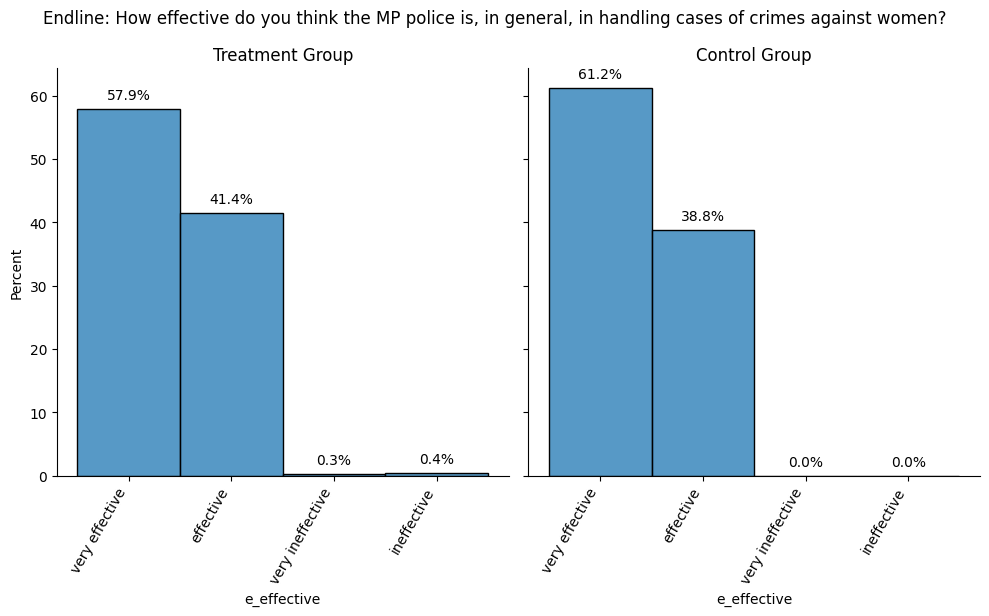

In [ ]:
# Plot Endline Study Attitudes on the Effectiveness of Police
# Plot using Seaborn distplot

ax=sns.displot(police_person_data_both, x='e_effective', stat="percent", kind="hist", col="treatment_x", common_norm=False)

ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(), rotation=60, ha="right")
ax.axes[0, 1].set_xticklabels(ax.axes[0, 1].get_xticklabels(), rotation=60, ha="right")

# Iterate through the axes objects within the FacetGrid
for ax_i in ax.axes.flat:
    # Access the patches (bars) within the current subplot
    for p in ax_i.patches:
        # Annotate each bar with its height (percentage)
        ax_i.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

for ax, title in zip(ax.axes.flat, ['Treatment Group', 'Control Group']):
    ax.set_title(title)

ax.figure.suptitle("Endline: How effective do you think the MP police is, in general, in handling cases of crimes against women?", y=1.05)

plt.show()

At Endline, over 98% of police repondents believe that the police are effective or very effective at dealing with CAW.  Similar distributions across treatment and control station responders.

<ipython-input-8-f2903f92748c>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(), rotation=60, ha="right")
<ipython-input-8-f2903f92748c>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.axes[0, 1].set_xticklabels(ax.axes[0, 1].get_xticklabels(), rotation=60, ha="right")


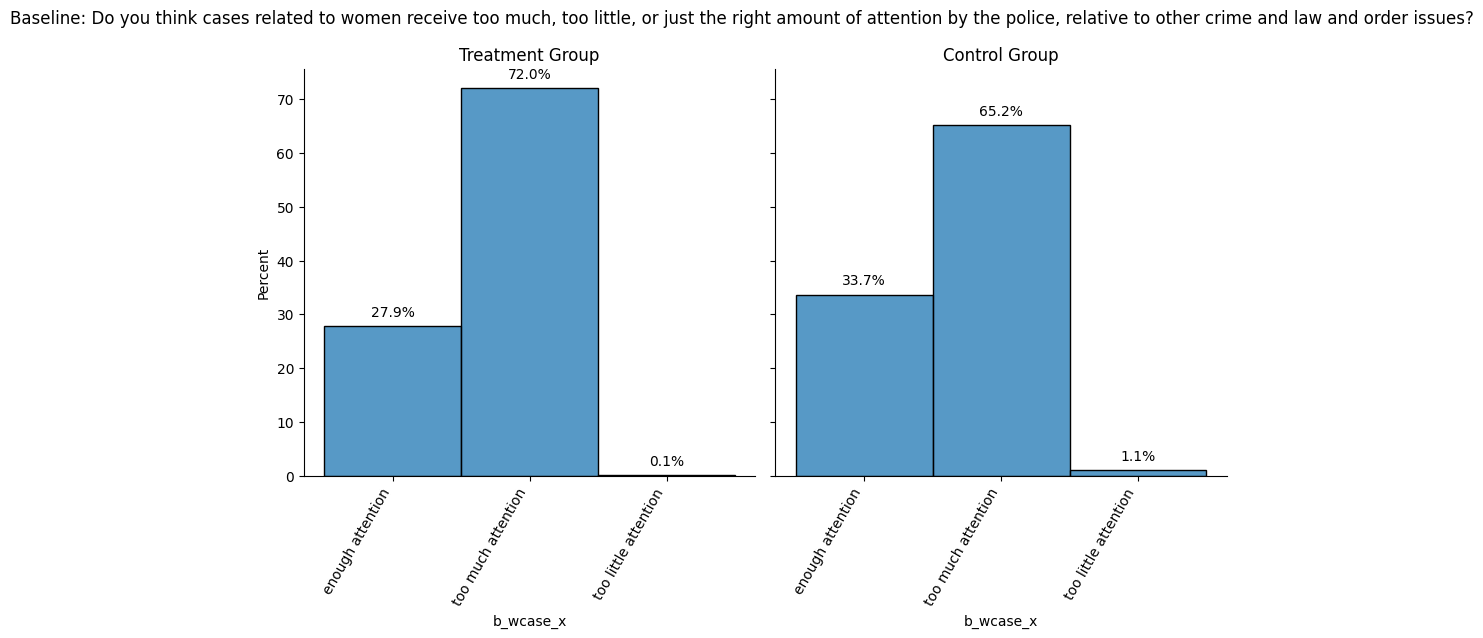

In [ ]:
# Plot Baseline Study Attitudes on the Attention of Police to Potential Crimes Against Women
# Plot using Seaborn distplot

ax=sns.displot(police_person_data_both, x='b_wcase_x', stat="percent", kind="hist", col="treatment_x", common_norm=False)

ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(), rotation=60, ha="right")
ax.axes[0, 1].set_xticklabels(ax.axes[0, 1].get_xticklabels(), rotation=60, ha="right")

# Iterate through the axes objects within the FacetGrid
for ax_i in ax.axes.flat:
    # Access the patches (bars) within the current subplot
    for p in ax_i.patches:
        # Annotate each bar with its height (percentage)
        ax_i.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

for ax, title in zip(ax.axes.flat, ['Treatment Group', 'Control Group']):
    ax.set_title(title)

ax.figure.suptitle("Baseline: Do you think cases related to women receive too much, too little, or just the right amount of attention by the police, relative to other crime and law and order issues?", y=1.05)

plt.show()

At Baseline, over 98% of police repondents believe that enough or too much attention is paid to CAW.  Similar distributions across treatment and control station responders.

<ipython-input-9-fee8d4a9bf70>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(), rotation=60, ha="right")
<ipython-input-9-fee8d4a9bf70>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.axes[0, 1].set_xticklabels(ax.axes[0, 1].get_xticklabels(), rotation=60, ha="right")


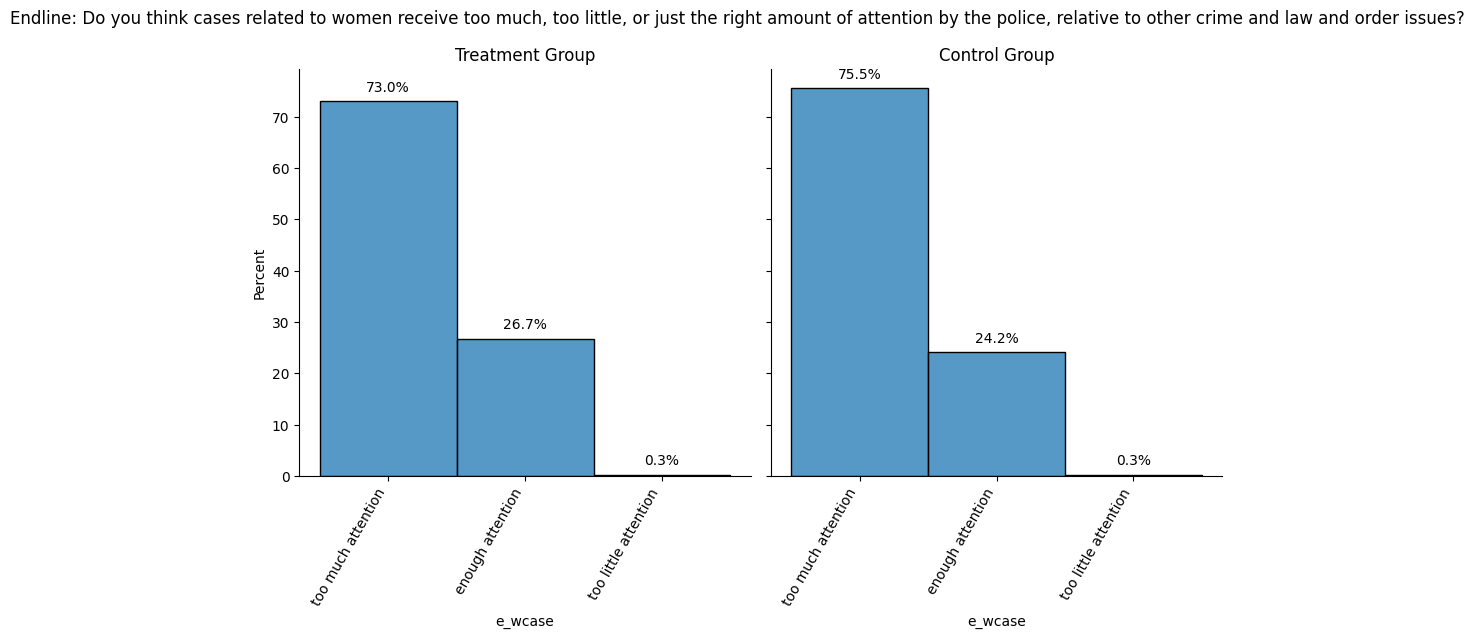

In [ ]:
# Plot Endline Study Attitudes on the Attention of Police to Potential Crimes Against Women
# Plot using Seaborn distplot

ax=sns.displot(police_person_data_both, x='e_wcase', stat="percent", kind="hist", col="treatment_x", common_norm=False)

ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(), rotation=60, ha="right")
ax.axes[0, 1].set_xticklabels(ax.axes[0, 1].get_xticklabels(), rotation=60, ha="right")

# Iterate through the axes objects within the FacetGrid
for ax_i in ax.axes.flat:
    # Access the patches (bars) within the current subplot
    for p in ax_i.patches:
        # Annotate each bar with its height (percentage)
        ax_i.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

for ax, title in zip(ax.axes.flat, ['Treatment Group', 'Control Group']):
    ax.set_title(title)

ax.figure.suptitle("Endline: Do you think cases related to women receive too much, too little, or just the right amount of attention by the police, relative to other crime and law and order issues?", y=1.05)

plt.show()

At Endline, over 99% of police repondents believe that enough or too much attention is paid to CAW.  Similar distributions across treatment and control station responders.

<ipython-input-10-8ba945b935e6>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(), rotation=60, ha="right")
<ipython-input-10-8ba945b935e6>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.axes[0, 1].set_xticklabels(ax.axes[0, 1].get_xticklabels(), rotation=60, ha="right")


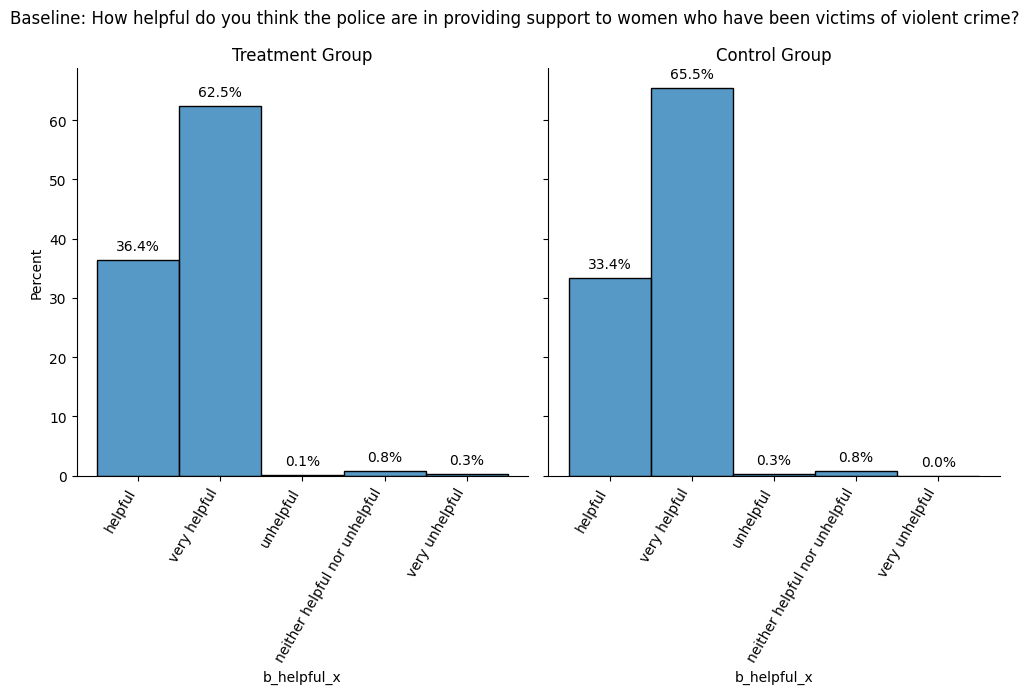

In [ ]:
# Plot Baseline Study Attitudes on the Helpfulness of Police
# Plot using Seaborn distplot

ax=sns.displot(police_person_data_both, x='b_helpful_x', stat="percent", kind="hist", col="treatment_x", common_norm=False)

ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(), rotation=60, ha="right")
ax.axes[0, 1].set_xticklabels(ax.axes[0, 1].get_xticklabels(), rotation=60, ha="right")

# Iterate through the axes objects within the FacetGrid
for ax_i in ax.axes.flat:
    # Access the patches (bars) within the current subplot
    for p in ax_i.patches:
        # Annotate each bar with its height (percentage)
        ax_i.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

for ax, title in zip(ax.axes.flat, ['Treatment Group', 'Control Group']):
    ax.set_title(title)

ax.figure.suptitle("Baseline: How helpful do you think the police are in providing support to women who have been victims of violent crime?", y=1.05)

plt.show()

At Baseline, over 98% of police repondents are helpful or very helpful to women that are victims of violent crimes.  Similar distributions across treatment and control station responders.

<ipython-input-11-324a44f1ddc4>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(), rotation=60, ha="right")
<ipython-input-11-324a44f1ddc4>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.axes[0, 1].set_xticklabels(ax.axes[0, 1].get_xticklabels(), rotation=60, ha="right")


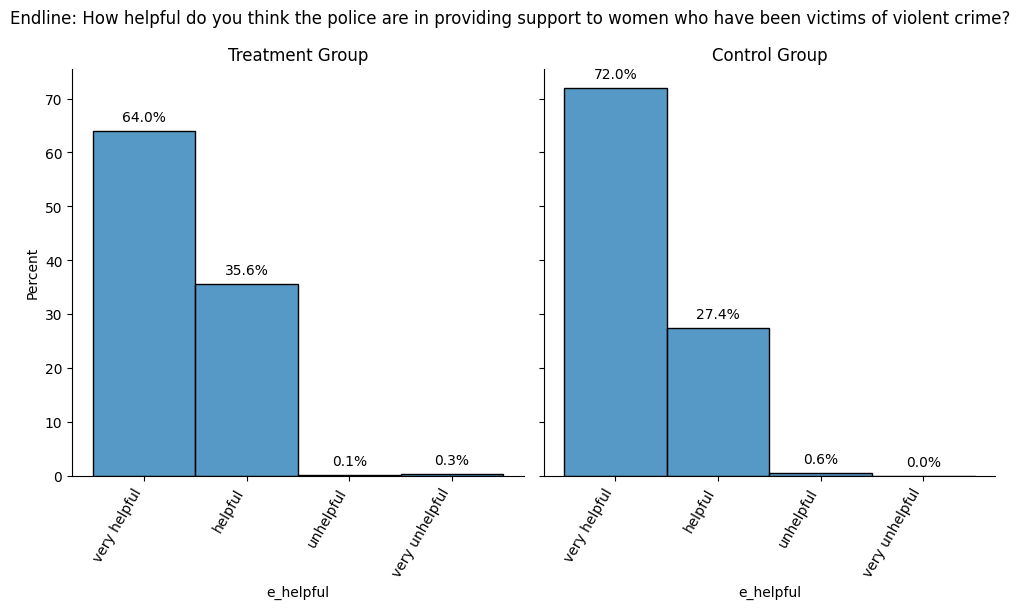

In [ ]:
# Plot Endline Study Attitudes on the Helpfulness of Police
# Plot using Seaborn distplot

ax=sns.displot(police_person_data_both, x='e_helpful', stat="percent", kind="hist", col="treatment_x", common_norm=False)

ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(), rotation=60, ha="right")
ax.axes[0, 1].set_xticklabels(ax.axes[0, 1].get_xticklabels(), rotation=60, ha="right")

# Iterate through the axes objects within the FacetGrid
for ax_i in ax.axes.flat:
    # Access the patches (bars) within the current subplot
    for p in ax_i.patches:
        # Annotate each bar with its height (percentage)
        ax_i.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

for ax, title in zip(ax.axes.flat, ['Treatment Group', 'Control Group']):
    ax.set_title(title)

ax.figure.suptitle("Endline: How helpful do you think the police are in providing support to women who have been victims of violent crime?", y=1.05)

plt.show()

At Endline, over 99% of police repondents are helpful or very helpful to women that are victims of violent crimes.  Similar distributions across treatment and control station responders.

<ipython-input-12-dd52b53e8691>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(), rotation=60, ha="right")
<ipython-input-12-dd52b53e8691>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.axes[0, 1].set_xticklabels(ax.axes[0, 1].get_xticklabels(), rotation=60, ha="right")


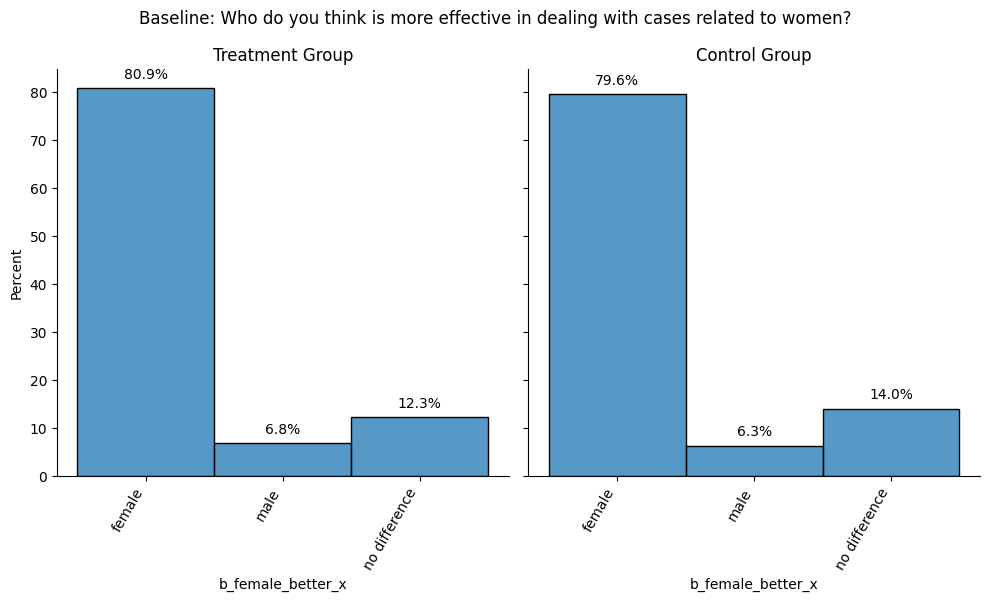

In [ ]:
# Plot Baseline Study Attitudes on the Effectiveness of Women Addressing Potential Crimes Against Women
# Plot using Seaborn distplot

ax=sns.displot(police_person_data_both, x='b_female_better_x', stat="percent", kind="hist", col="treatment_x", common_norm=False)

ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(), rotation=60, ha="right")
ax.axes[0, 1].set_xticklabels(ax.axes[0, 1].get_xticklabels(), rotation=60, ha="right")

# Iterate through the axes objects within the FacetGrid
for ax_i in ax.axes.flat:
    # Access the patches (bars) within the current subplot
    for p in ax_i.patches:
        # Annotate each bar with its height (percentage)
        ax_i.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

for ax, title in zip(ax.axes.flat, ['Treatment Group', 'Control Group']):
    ax.set_title(title)

ax.figure.suptitle("Baseline: Who do you think is more effective in dealing with cases related to women?", y=1.05)

plt.show()

At Baseline, around 8 out 10 responders believe that women are more effective at addressing CAW.  Similar distributions across treatment and control station responders.

<ipython-input-13-ef5bd069d4ad>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(), rotation=60, ha="right")
<ipython-input-13-ef5bd069d4ad>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.axes[0, 1].set_xticklabels(ax.axes[0, 1].get_xticklabels(), rotation=60, ha="right")


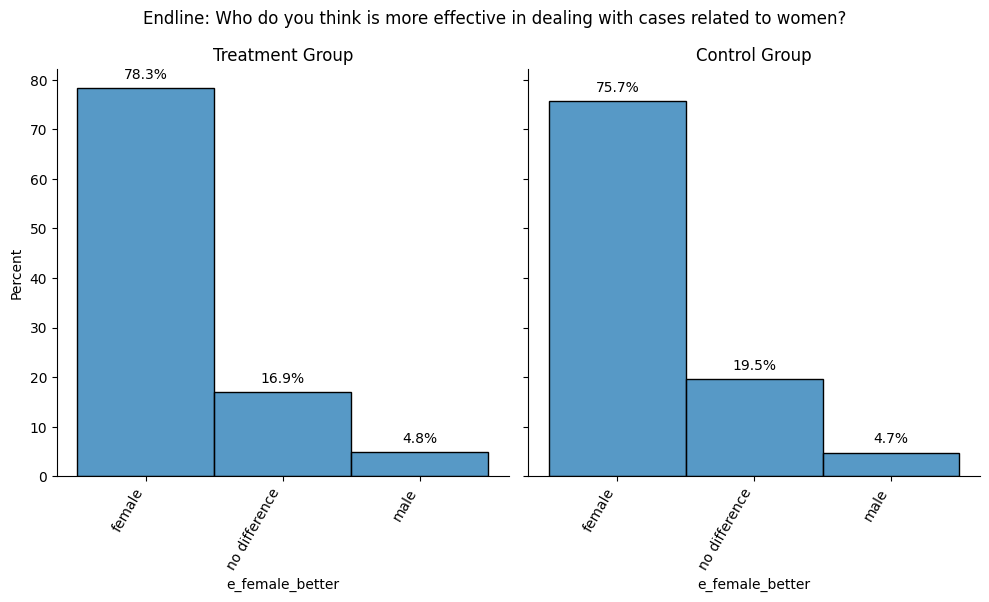

In [ ]:
# Plot Endline Study Attitudes on the Effectiveness of Women Addressing Potential Crimes Against Women
# Plot using Seaborn distplot

ax=sns.displot(police_person_data_both, x='e_female_better', stat="percent", kind="hist", col="treatment_x", common_norm=False)

ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(), rotation=60, ha="right")
ax.axes[0, 1].set_xticklabels(ax.axes[0, 1].get_xticklabels(), rotation=60, ha="right")

# Iterate through the axes objects within the FacetGrid
for ax_i in ax.axes.flat:
    # Access the patches (bars) within the current subplot
    for p in ax_i.patches:
        # Annotate each bar with its height (percentage)
        ax_i.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

for ax, title in zip(ax.axes.flat, ['Treatment Group', 'Control Group']):
    ax.set_title(title)

ax.figure.suptitle("Endline: Who do you think is more effective in dealing with cases related to women?", y=1.05)

plt.show()

At Endline, around 75% of responders believe that women are more effective at addressing CAW.  Similar distributions across treatment and control station responders.

<ipython-input-14-3111b6794fc4>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(), rotation=60, ha="right")
<ipython-input-14-3111b6794fc4>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.axes[0, 1].set_xticklabels(ax.axes[0, 1].get_xticklabels(), rotation=60, ha="right")


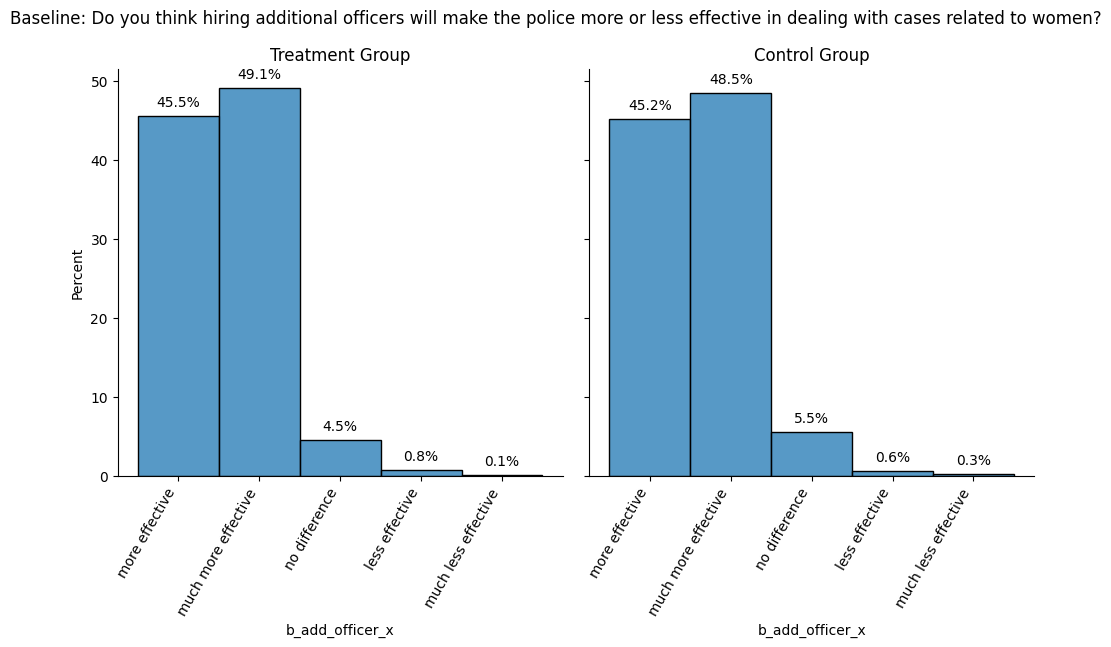

In [ ]:
# Plot Baseline Study Attitudes on the Benefit of Adding More Officers To Address Potential Crimes Against Women
# Plot using Seaborn distplot

ax=sns.displot(police_person_data_both, x='b_add_officer_x', stat="percent", kind="hist", col="treatment_x", common_norm=False)

ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(), rotation=60, ha="right")
ax.axes[0, 1].set_xticklabels(ax.axes[0, 1].get_xticklabels(), rotation=60, ha="right")

# Iterate through the axes objects within the FacetGrid
for ax_i in ax.axes.flat:
    # Access the patches (bars) within the current subplot
    for p in ax_i.patches:
        # Annotate each bar with its height (percentage)
        ax_i.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

for ax, title in zip(ax.axes.flat, ['Treatment Group', 'Control Group']):
    ax.set_title(title)

ax.figure.suptitle("Baseline: Do you think hiring additional officers will make the police more or less effective in dealing with cases related to women?", y=1.05)

plt.show()

At Baseline, approximately 95% responders believe that hiring more officers would help police become more effective or much more effective at addressing cases related to women.  Similar distributions across treatment and control station responders.

<ipython-input-15-fbbfddf81d49>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(), rotation=60, ha="right")
<ipython-input-15-fbbfddf81d49>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.axes[0, 1].set_xticklabels(ax.axes[0, 1].get_xticklabels(), rotation=60, ha="right")


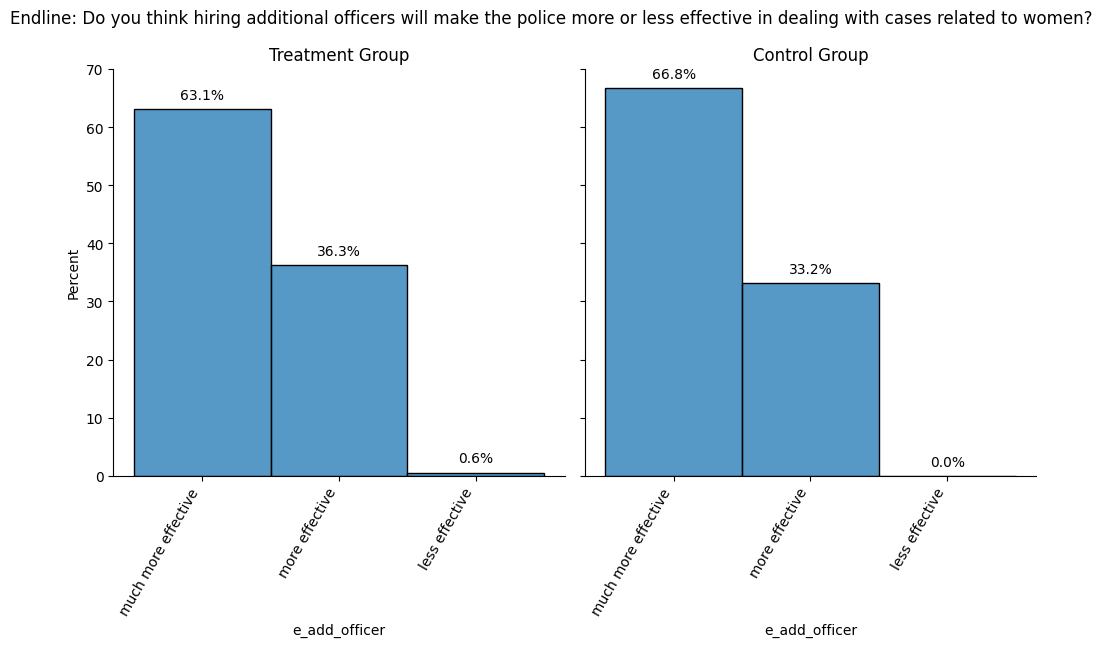

In [ ]:
# Plot Endline Study Attitudes on the Benefit of Adding More Officers To Address Potential Crimes Against Women
# Plot using Seaborn distplot

ax=sns.displot(police_person_data_both, x='e_add_officer', stat="percent", kind="hist", col="treatment_x", common_norm=False)

ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(), rotation=60, ha="right")
ax.axes[0, 1].set_xticklabels(ax.axes[0, 1].get_xticklabels(), rotation=60, ha="right")

# Iterate through the axes objects within the FacetGrid
for ax_i in ax.axes.flat:
    # Access the patches (bars) within the current subplot
    for p in ax_i.patches:
        # Annotate each bar with its height (percentage)
        ax_i.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

for ax, title in zip(ax.axes.flat, ['Treatment Group', 'Control Group']):
    ax.set_title(title)

ax.figure.suptitle("Endline: Do you think hiring additional officers will make the police more or less effective in dealing with cases related to women?", y=1.05)

plt.show()

At Endline, approximately 99% responders believe that hiring more officers would help police become more effective or much more effective at addressing cases related to women.  Similar distributions across treatment and control station responders.

<ipython-input-16-d414c917c8e5>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(), rotation=60, ha="right")
<ipython-input-16-d414c917c8e5>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.axes[0, 1].set_xticklabels(ax.axes[0, 1].get_xticklabels(), rotation=60, ha="right")


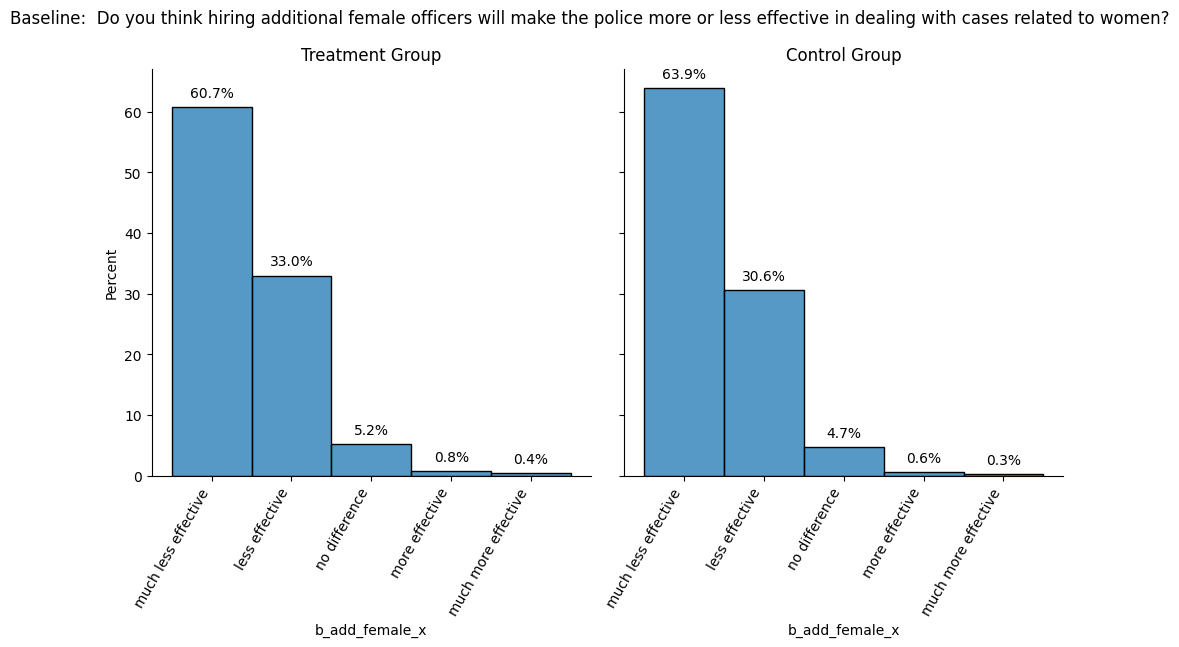

In [ ]:
# Plot Baseline Study Attitudes on the Benefit of Adding More Female Officers To Address Potential Crimes Against Women
# Plot using Seaborn distplot

ax=sns.displot(police_person_data_both, x='b_add_female_x', stat="percent", kind="hist", col="treatment_x", common_norm=False)

ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(), rotation=60, ha="right")
ax.axes[0, 1].set_xticklabels(ax.axes[0, 1].get_xticklabels(), rotation=60, ha="right")

# Iterate through the axes objects within the FacetGrid
for ax_i in ax.axes.flat:
    # Access the patches (bars) within the current subplot
    for p in ax_i.patches:
        # Annotate each bar with its height (percentage)
        ax_i.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

for ax, title in zip(ax.axes.flat, ['Treatment Group', 'Control Group']):
    ax.set_title(title)

ax.figure.suptitle("Baseline:  Do you think hiring additional female officers will make the police more or less effective in dealing with cases related to women?", y=1.05)

plt.show()

At Baseline, approximately 94% responders believe that hiring more female officers would result in police becoming less effective or much less effective at addressing cases related to women.  Similar distributions across treatment and control station responders.

<ipython-input-17-6371b1e97534>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(), rotation=60, ha="right")
<ipython-input-17-6371b1e97534>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.axes[0, 1].set_xticklabels(ax.axes[0, 1].get_xticklabels(), rotation=60, ha="right")


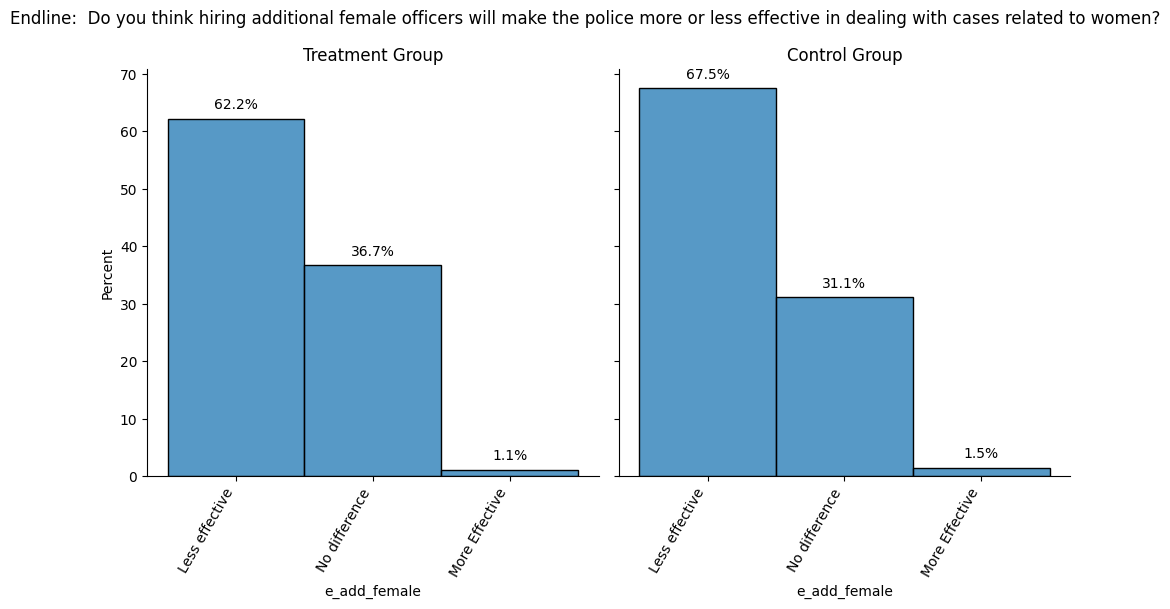

In [ ]:
# Plot Baseline Study Attitudes on the Benefit of Adding More Female Officers To Address Potential Crimes Against Women
# Plot using Seaborn distplot

ax=sns.displot(police_person_data_both, x='e_add_female', stat="percent", kind="hist", col="treatment_x", common_norm=False)

ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(), rotation=60, ha="right")
ax.axes[0, 1].set_xticklabels(ax.axes[0, 1].get_xticklabels(), rotation=60, ha="right")

# Iterate through the axes objects within the FacetGrid
for ax_i in ax.axes.flat:
    # Access the patches (bars) within the current subplot
    for p in ax_i.patches:
        # Annotate each bar with its height (percentage)
        ax_i.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

for ax, title in zip(ax.axes.flat, ['Treatment Group', 'Control Group']):
    ax.set_title(title)

ax.figure.suptitle("Endline:  Do you think hiring additional female officers will make the police more or less effective in dealing with cases related to women?", y=1.05)

plt.show()

At Endline, approximately 99% responders believe that hiring more female officers would result in police becoming less effective or no difference at addressing cases related to women.  Similar distributions across treatment and control station responders.  Note:  the potential responses for this question changed from the baseline study ("much less effective" is no longer an option)

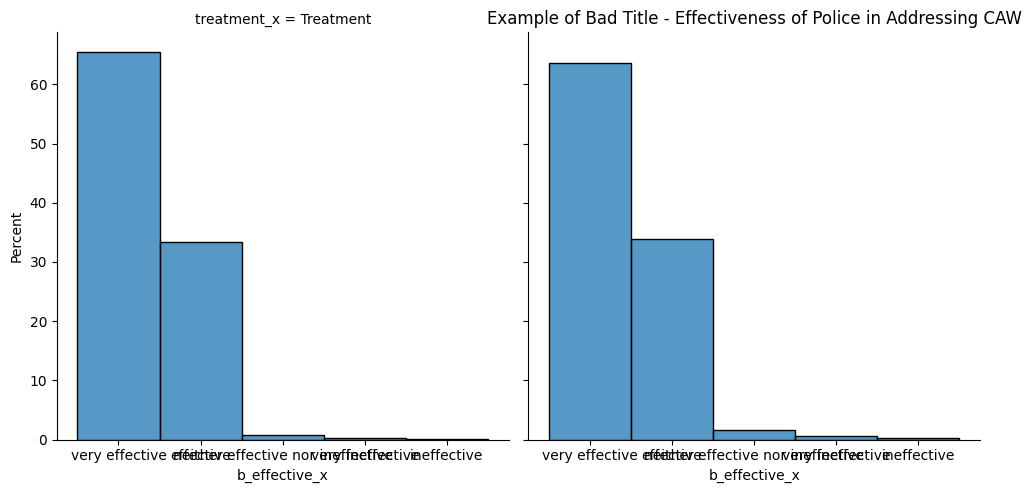

In [ ]:
# Showing Example of Initial Chart - That Wasn't Legible of Informative

ax=sns.displot(police_person_data_both, x='b_effective_x', stat="percent", kind="hist", col="treatment_x", common_norm=False)

# Add a title
plt.title("Example of Bad Title - Effectiveness of Police in Addressing CAW")


plt.show()


Example of First Chart Created - Title Wasn't Centered, Title Hid the subtitle for the control group distributions; X-Axis Labels Overlapped, Actual Column %s weren't clear